# PREDICTIVE DEMAND MODEL

InterstellarX Inc (IXI) is a company engaged in providing Strategy, Technology, Data sciences and Creative Design services to large global clients.

The core business entails revenue generation by providing the right resources to clients, across the world, for specific projects, based on service requirements.

Problem Statement

One of the most critical business compulsions as well as challenges for IXI, is to manage their People Supply Chain – by mapping the Demand for resources (A resource is tagged by metadata such as primary skillset, location, qualification and experience level etc See attached Demand.xls) to the Net Supply of resources (from various Internal and External hiring channels, keeping attrition in view).

IXI maintains, and periodically replenishes a Bench (Inventory) of resources depending upon forecasted demand for the next few quarters. There is a steep cost constraint associated with maintaining this bench (On average $685 per person per month) and hence the company needs to ensure demand forecast is as accurate as possible, so Supply can be planned accordingly. (Maintaining a bench implies absorbing the cost of a resource who is not billable, and hence is an unproductive cost to the company till he/she is allocated to a billable project)

You need to develop a machine-learning based predictive demand model.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

# Analysing the data

In [24]:
Demands=pd.read_excel("Demandv1.1.xlsx",sheet_name="Demand Trend Last year")
Headcount=pd.read_excel("Demandv1.1.xlsx",sheet_name="Headcount")
Demands.head()

,Month DD Raised,No. of FTE Request Raised,SkillList,Location,Experience Grade,Practice,Skill Group,Demand Source
0,May,4,Salesforce (Functional),Bangalore,A4,BANK,(F) IT Operations,Account
1,October,2,"Amazon Web services - Build , Administration a...",Bhubaneswar,B2,M&FT,(F) IT Operations,Account
2,March,2,"Amazon Web services - Build , Administration a...",Pune,A3,TEST,NaN,Support
3,October,1,Test Automation,Bhubaneswar,B2,M&FT,(F) IT Operations,Account
4,June,2,PMO (Account),Noida,A5,I&D,(D) Banking Sector,Proactive


In [3]:
Headcount.head()

,Region,Employee Code,Last Name,Local Date of Joining,Designation,Status,Market Unit,SkillList,Location
0,US,45149,AALLURI,2016-10-31,CONSULTANT,Billable,BANK,Salesforce (Functional),Bangalore
1,IN,47875,AARATTUKULAM,2014-11-20,SENIOR SOFTWARE ENGINEER,Billable,BANK,"Amazon Web services - Build , Administration a...",Bhubaneswar
2,IN,90386,AASHIK,2014-12-15,ASSOCIATE CONSULTANT,Billable,BANK,"Amazon Web services - Build , Administration a...",Pune
3,IN,41161,Aastha,2015-02-26,ASSOCIATE CONSULTANT,Billable,BANK,Test Automation,Bhubaneswar
4,IN,92293,ABBAN,2013-12-02,CONSULTANT,Billable,BANK,PMO (Account),Noida


In [25]:
import matplotlib.pyplot as plt
import mglearn

months={'January':1,'February':2,'March':3,'May':5,'June':6,'August':8,'October':10,'December':12}
Demands=Demands.replace({'Month DD Raised':months})
for i in Demands.drop(['No. of FTE Request Raised','Month DD Raised'],axis=1).columns :
    temp_dict={}
    num=1
    for j in Demands[i].unique():
        temp_dict[j]=num
        num=num+1
    Demands=Demands.replace({i:temp_dict})

<IPython.core.display.Javascript object>


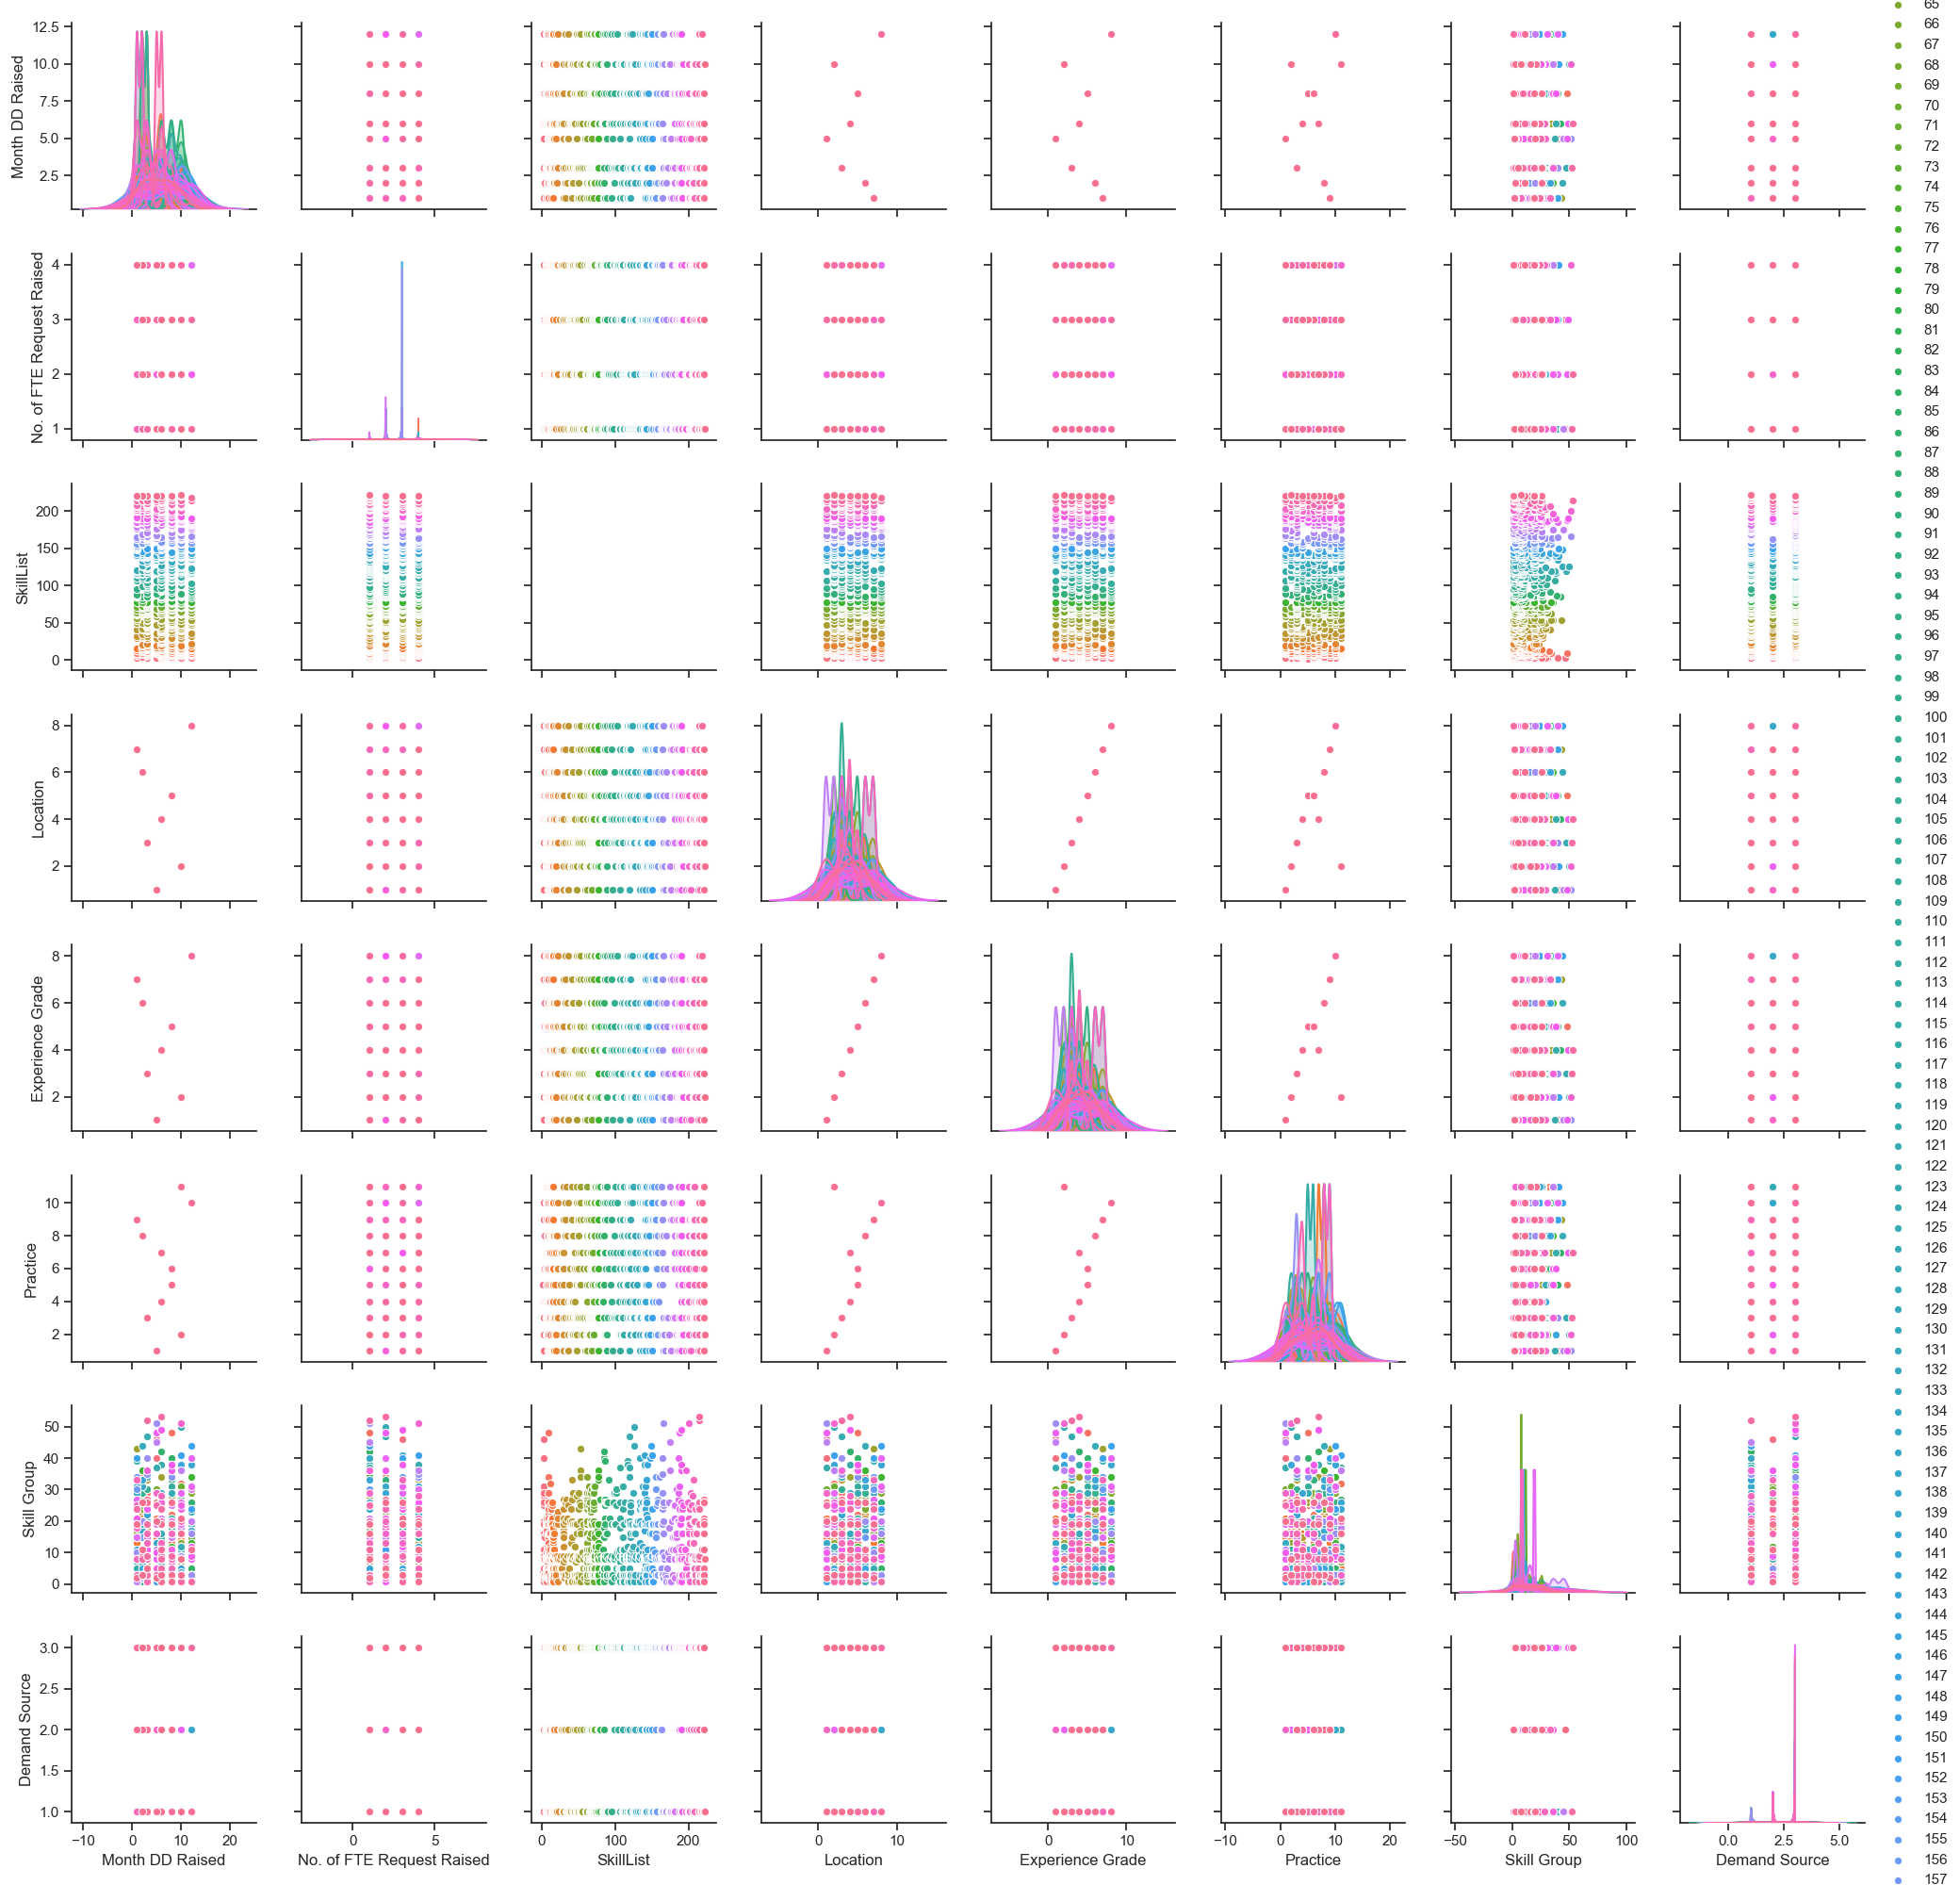

C:\Python\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Python\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Python\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Python\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [26]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Demands, hue="SkillList")

From the plots, we can see that the classes are not well separated ,
Therefore it’s difficult for a machine learning model to separate them using a classifier !

# TOP 50 SKILLS

In [7]:
Demands=pd.read_excel("Demandv1.1.xlsx",sheet_name="Demand Trend Last year",usecols='A:D')
Headcount=pd.read_excel("Demandv1.1.xlsx",sheet_name="Headcount",usecols='D,F,H,I')
Headcount.loc[Headcount['Status']=='Billable','Status']=1
Headcount.loc[Headcount['Status']=='Bench','Status']=0
Headcount['Local Date of Joining']=pd.to_datetime(Headcount['Local Date of Joining'])
Headcount=Headcount.fillna(0)

([<matplotlib.axis.XTick at 0x1dfcafde710>,
 <a list of 50 Text xticklabel objects>)

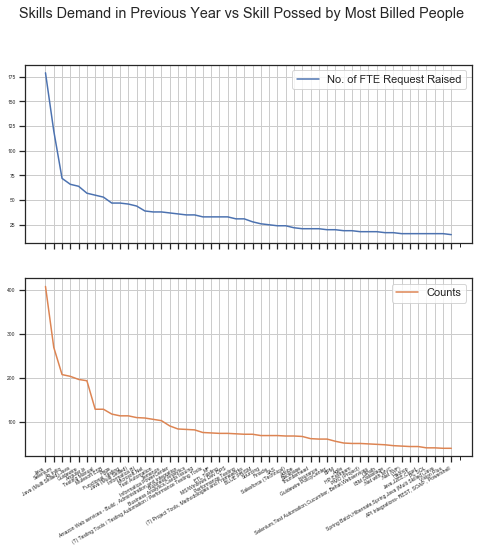

In [8]:
s=[]
l=Headcount.where(Headcount['Status']==1).dropna()['SkillList']
for i in l:
    s=s+[i]
counts,unique= np.unique(s, return_counts=True)
df = pd.DataFrame(unique,counts,columns={'Counts'}).reset_index().sort_values(['Counts'],ascending=False).rename(index=str, columns={"index": "unique"})
top10a=df.nlargest(50,'Counts').rename(index=str, columns={"unique": "SkillList"}).set_index('SkillList')
top10=Demands.drop(['Month DD Raised'],axis=1)
top=top10.groupby(['SkillList']).agg({'No. of FTE Request Raised':np.sum}).sort_values('No. of FTE Request Raised',ascending=False)
top10=top.nlargest(50,'No. of FTE Request Raised')
topm=top10.merge(top10a,on=top10a.index,how='outer')
top_m=topm.rename(index=str, columns={"key_0": "SkillList"})
axes = top_m.plot.line(subplots=True,figsize=(8,8),fontsize=5,grid=True,title='Skills Demand in Previous Year vs Skill Possed by Most Billed People')
plt.xticks(np.arange(len(top_m['SkillList'])), top_m['SkillList'])


C:\Python\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


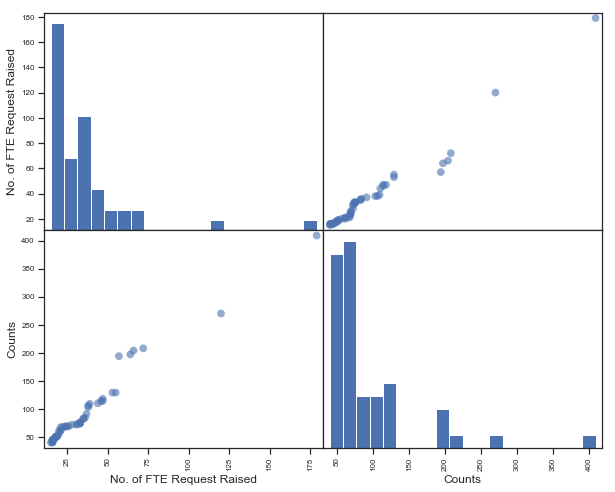

In [9]:
import matplotlib.pyplot as plt
import mglearn
grr = pd.scatter_matrix(top_m,  figsize=(10, 8), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.6)

DEMANDS THROUGHOUT DIFFERENT MONTHS

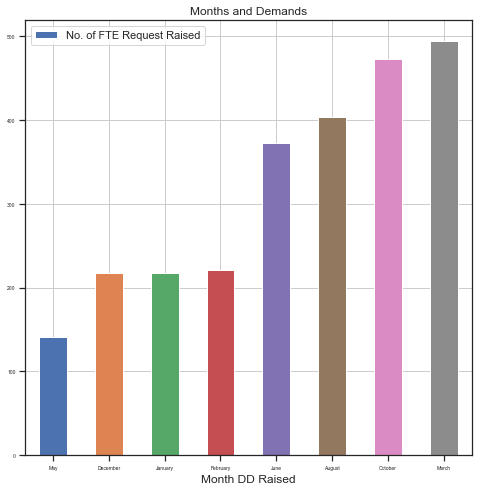

In [10]:
temp=Headcount[Headcount['Status']==1].drop(['Location'],axis=1)
temp2=Demands.drop(['Location'],axis=1)
p1_1984_2000=temp.where(temp['Local Date of Joining']<pd.datetime(2000,1,1)).dropna()
p1_2000_2009=temp[(temp['Local Date of Joining']<'2009-1-1') & (temp['Local Date of Joining']>='2000-1-1')].dropna()
p1_2009=temp[(temp['Local Date of Joining']>='2009-1-1')].dropna()
add=temp2.groupby(['Month DD Raised']).agg({'No. of FTE Request Raised': np.sum}).reset_index().sort_values('No. of FTE Request Raised')
ax = add.plot.bar(x='Month DD Raised', y='No. of FTE Request Raised', rot=0,title ='Months and Demands', figsize=(8,8),fontsize=5,grid=True)

DEMAND VALUES VS DEMAND TRENDS

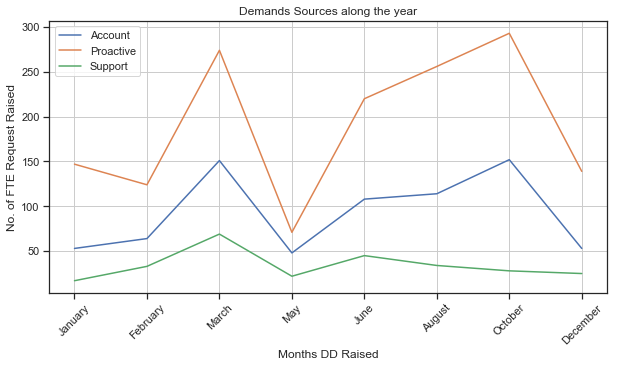

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
D=pd.read_excel("Demandv1.1.xlsx",sheet_name="Demand Trend Last year",usecols='A:B,H')
months={'January':1,'February':2,'March':3,'May':5,'June':6,'August':8,'October':10,'December':12}
D=D.replace({'Month DD Raised':months})
D=D.groupby(['Month DD Raised','Demand Source']).agg({'No. of FTE Request Raised':np.sum}).reset_index(level=[0,1])
months_invert={v:k for k, v in months.items()}
D=D.replace({'Month DD Raised':months_invert})
fig,ax=plt.subplots()
plt.xticks(np.arange(len(D['Month DD Raised'])), D['Month DD Raised'])
for key,grp in D.groupby('Demand Source'):
    ax=grp.plot(ax=ax,kind='line',x='Month DD Raised',y='No. of FTE Request Raised',label=key)

plt.legend(loc='best')
plt.grid()
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
ax.set_xlabel('Months DD Raised')
ax.set_ylabel('No. of FTE Request Raised')
ax.set_title('Demands Sources along the year')
plt.subplots_adjust(bottom=0.25)
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# MODELS AND PREDICTIONS

In [12]:
import pandas as pd
import numpy as np
from sklearn.multiclass import OneVsOneClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.svm import SVC


Converting the Data

In [15]:
Demands=pd.read_excel("Demandv1.1.xlsx",sheet_name="Demand Trend Last year",usecols='A:D,F').rename(index=str, columns={"Month DD Raised": "Date", "No. of FTE Request Raised": "Count","SkillList": "ID"}).set_index('ID').reset_index()
location={}
j=1
for i in Demands['Location'].unique():
    location[i]=j
    j=j+1
Demands=Demands.replace({"Location":location})
practice={}
j=1
for i in Demands['Practice'].unique():
    practice[i]=j
    j=j+1
Demands=Demands.replace({"Practice":practice})
b=Demands['ID'].unique()
ID={}
j=1
for i in b:
    ID[i]=j
    j=j+1
Demands=Demands.replace({"ID":ID})

month={'January':1,'February':2,'March':3,'April':4,'May':5,
       'June':6,'July':7,'August':8,'September':9,'October':10,
        'November':11,'December':12}
Demands=Demands.replace({"Date":month})
X=Demands[['Practice','Location','Date','ID']]
y=np.array(Demands[['Date','Count']])

USING KNEIGHBOR-CLASSIFIER

In [22]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train,Y_train) 
p=neigh.predict(X_test)
print(np.mean(p==Y_test))


0.524390243902439


USING DECISION TREE CLASSIFIER

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=4,max_depth=25)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)
clf.fit(X_train,Y_train)
pred=clf.predict(X_test)
np.mean(pred==Y_test)


0.6219512195121951

USING RANDOM FOREST CLASSIFIER

In [18]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)
clf = RandomForestClassifier(n_estimators=40,max_depth=60,max_features=0.2)
clf.fit(X_train,Y_train)
pred=clf.predict(X_train)
np.mean(pred==Y_train)

0.8808068459657702

# PLOTTING TRAIN DATA

<IPython.core.display.Javascript object>


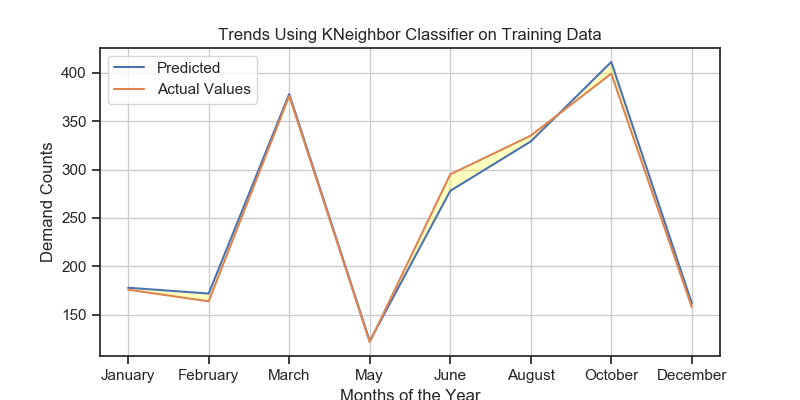

Text(0.5,1,'Trends Using KNeighbor Classifier on Training Data')

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib notebook
mon = {v: k for k, v in month.items()}
dataset = pd.DataFrame({'Count':pred[:,1],'Date':pred[:,0]}).groupby(['Date']).agg({'Count':np.sum}).reset_index().replace({'Date':mon})
dataset2=pd.DataFrame({'Date':Y_train[:,0],'Count':Y_train[:,1]}).groupby(['Date']).agg({'Count':np.sum}).reset_index().replace({'Date':mon})
plt.figure(figsize=(8,4))
plt.plot(dataset.index,dataset['Count'],label='Predicted')
plt.plot(dataset2.index,dataset2['Count'],label='Actual Values')
plt.xlabel('Months of the Year')
plt.ylabel('Demand Counts')
plt.xticks(np.arange(len(dataset['Date'])), dataset['Date'])
plt.legend(loc='best')
plt.grid()
a=np.array(dataset.index)
plt.gca().fill_between(a, dataset['Count'], dataset2['Count'],facecolor='yellow',  alpha=0.25)
plt.title("Trends Using KNeighbor Classifier on Training Data")


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib notebook
mon = {v: k for k, v in month.items()}
dataset = pd.DataFrame({'Predicted':pred[:,1],'Date':pred[:,0]}).groupby(['Date']).agg({'Predicted':np.sum}).reset_index().replace({'Date':mon})
dataset2=pd.DataFrame({'Date':Y_train[:,0],'Trained':Y_train[:,1]}).groupby(['Date']).agg({'Trained':np.sum}).reset_index().replace({'Date':mon})
dataset['Trained']=dataset2['Trained']
dataset.plot.kde()
plt.grid()
plt.title('Kernel Density Estimate')

# PLOTTING TEST DATA

<IPython.core.display.Javascript object>


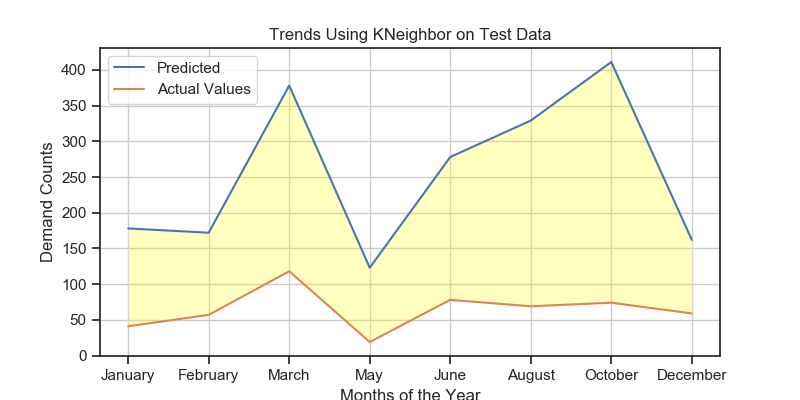

Text(0.5,1,'Trends Using KNeighbor on Test Data')

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib notebook
mon = {v: k for k, v in month.items()}
dataset = pd.DataFrame({'Count':pred[:,1],'Date':pred[:,0]}).groupby(['Date']).agg({'Count':np.sum}).reset_index().replace({'Date':mon})
dataset2=pd.DataFrame({'Date':Y_test[:,0],'Count':Y_test[:,1]}).groupby(['Date']).agg({'Count':np.sum}).reset_index().replace({'Date':mon})
plt.figure(figsize=(8,4))
plt.plot(dataset.index,dataset['Count'],label='Predicted')
plt.plot(dataset2.index,dataset2['Count'],label='Actual Values')
plt.xlabel('Months of the Year')
plt.ylabel('Demand Counts')
plt.xticks(np.arange(len(dataset['Date'])), dataset['Date'])
plt.legend(loc='best')
plt.grid()
a=np.array(dataset.index)
plt.gca().fill_between(a, dataset['Count'], dataset2['Count'],facecolor='yellow',  alpha=0.25)
plt.title("Trends Using KNeighbor on Test Data")


<IPython.core.display.Javascript object>


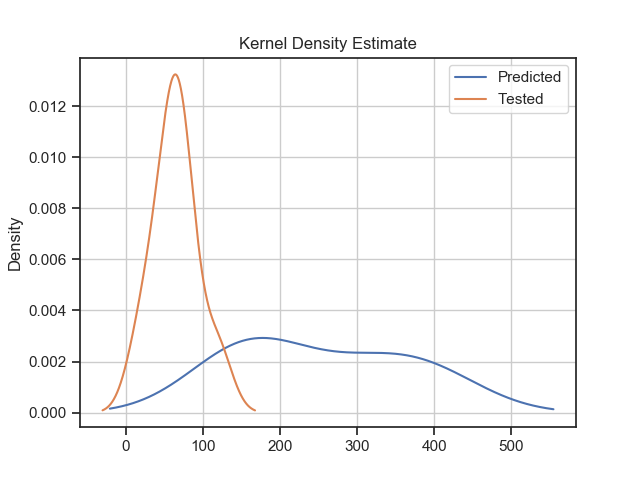

Text(0.5,1,'Kernel Density Estimate')

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib notebook
mon = {v: k for k, v in month.items()}
dataset = pd.DataFrame({'Predicted':pred[:,1],'Date':pred[:,0]}).groupby(['Date']).agg({'Predicted':np.sum}).reset_index().replace({'Date':mon})
dataset2=pd.DataFrame({'Date':Y_test[:,0],'Tested':Y_test[:,1]}).groupby(['Date']).agg({'Tested':np.sum}).reset_index().replace({'Date':mon})
dataset['Tested']=dataset2['Tested']
dataset.plot.kde()
plt.grid()
plt.title('Kernel Density Estimate')